# Algorithms and Applications in Social Networks
## Homework 1
### Ido Lerer 206120545, Offek Gil 308315092

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

## Question 1

### Question 1a

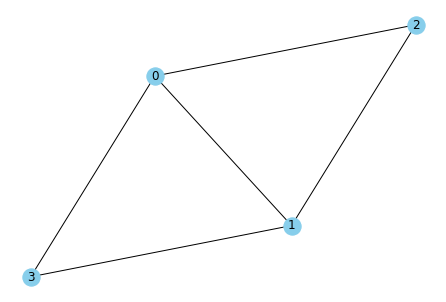

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def erdos_renyi_graph(n,p):
    G=nx.Graph()
    for i in range(n):
        G.add_node(i)
    
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < p:
                G.add_edge(i,j)
    return G        
   
    
    
G = erdos_renyi_graph(4,0.8)
nx.draw(G,with_labels = True, node_color="skyblue")
plt.show()

### Question 1b

In [26]:
def node_clustering(G, node):
    neighb = G[node]
    neighb_dict = dict(neighb)
    possible_edges = (len(neighb) * (len(neighb)-1)) / 2 
    
    if possible_edges == 0:
        return 0
    
    edges = 0
    for n in neighb:
        neighb_dict.pop(n)
        for n2 in neighb_dict:
            if n in G[n2]:
                edges += 1
    return edges / possible_edges
                

def graph_clustering(G):
    sum_clusts = 0
    for node in G:
        sum_clusts +=  node_clustering(G, node)
    return sum_clusts / len(G)

node_clustering(G, 2)
print(graph_clustering(G))

0.8333333333333333


### Question 1c

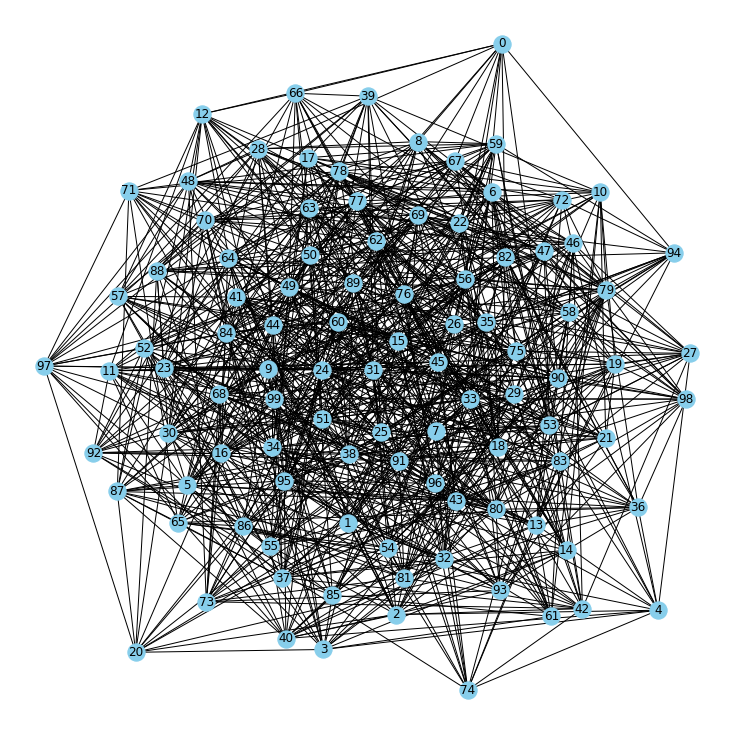

In [4]:
G1 = erdos_renyi_graph(100,0.2)

plt.figure(figsize=(10,10)) 
nx.draw(G1, with_labels = True, node_color="skyblue")
plt.show()

Diameter: 3
Clustering coefficient: 0.18244357865976507


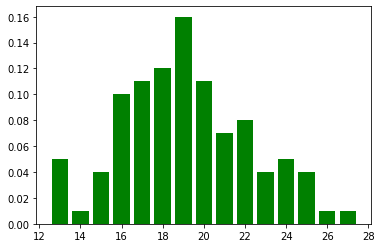

In [5]:
def degree_dist(G):
    N = len(G)
    Nk = {}
    for node in G:
        deg = G.degree[node]
        if deg not in Nk:
            Nk[deg] = 0
        Nk[deg] += 1
    for i in Nk:
        Nk[i] = Nk[i]/N
    return Nk

G1_dd = degree_dist(G1)
G1_diameter =  nx.diameter(G1)
G1_clust = graph_clustering(G1)

plt.bar(list(G1_dd.keys()), G1_dd.values(), color='g')
print("Diameter:", G1_diameter)
print("Clustering coefficient:", G1_clust)

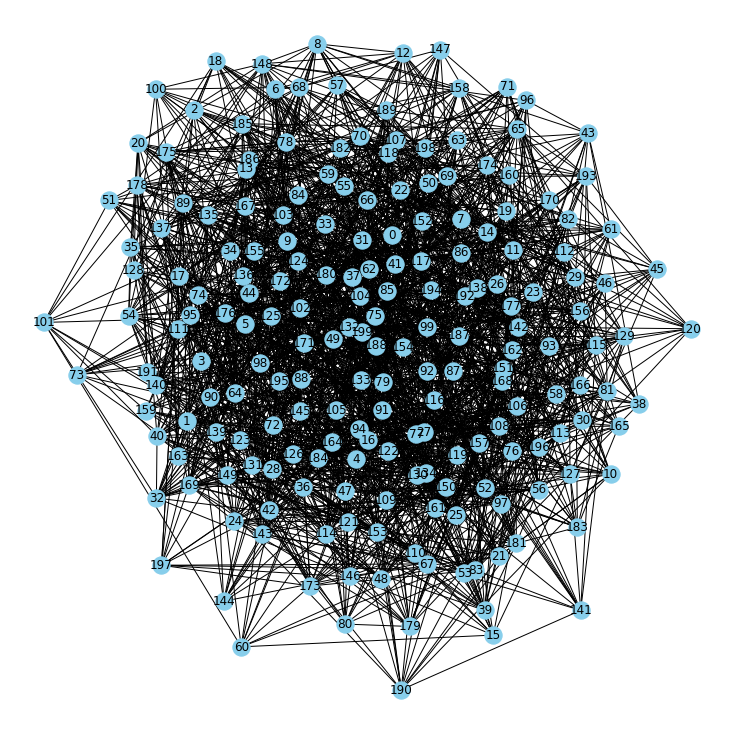

In [6]:
#Q1c - n = 200 p = 0.1

G2 = erdos_renyi_graph(200,0.1)

plt.figure(figsize=(10,10)) 
nx.draw(G2, with_labels = True, node_color="skyblue")
plt.show()

Diameter: 3
Clustering coefficient: 0.10147170183926386


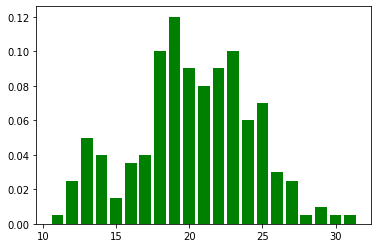

In [7]:
G2_dd = degree_dist(G2)
G2_diameter =  nx.diameter(G2)
G2_clust = graph_clustering(G2)

plt.bar(list(G2_dd.keys()), G2_dd.values(), color='g')
print("Diameter:", G2_diameter)
print("Clustering coefficient:", G2_clust)

### Question 1c - Analasis

<p dir="rtl" style="text-align:right">
ניתן לראות כי התפלגות הדרגות של שני הגרפים דומה לצורת פעמון, סביב מרכז של דרגה 20.
תוצאה זו הגיונית עבור שני סוגי הגראפים הרדנומליים - בגרף עם 100 הצמתים, כל קשת נוצרת בהסתברות 0.2, ועל כן אם לכל צומת יש פוטנציאל אפשרי של 100 קשתות שיוצאות ממנה, אכן נצפה לראות כי 20% מכלל האפשרויות, יופיעו - כלומר ממוצע של 20 קשתות מכל צומת.
ומבחינת הגרף עם 200 הצמתים, לכל צומת יש פוטנציאל של עד 200 קשתות, אך כל קשת נוצרת בהסתברות 0.1, משמע ממוצע של 20 קשתות לצומת גם כאן.
</p>
<p dir="rtl" style="text-align:right">
קוטר - לשני הגרפים יצא ערך קוטר 3, משמע מכל צומת בגרף ניתן להגיע לכל צומת אחר, במקסימום 3 צעדים. תוצאה זו הגיונית בעינינו - אם מסתכלים על צומת בודד בגרף, למשל גרף ה100 צמתים, אז יוצאות ממנו בממוצע 20 קשתות לצמתים שונים. בממוצע, מכל אחד מהצמתים השכנים, יוצאים גם כן 20 קשתות, כלומר 400 קשתות שמובילות אל צמתים שגם מהם בממוצע יוצאים 20 קשתות. על כן ההסתברות שלא יהיה ניתן להגיע מצומת אחד אל צומת אחר בגרף תוך 3 צעדים, היא מזערית. בגרף ה-200 צמתים, הדבר דומה.
</p>
<p dir="rtl" style="text-align:right">
קלאסטרינג - בכל גרף יצא כי פרמטר הקלאסטרינג קרוב מאוד לפרמטר ההסתברות ליצירת קשת (p).
זוהי תוצאה לה ציפיני, שכן פרמטר הקלאסטרינג מסתכל עבור קבוצה של צמתים, על כל הקשתות הפוטנציאליות שיכולות לעבור ביניהם, ונותן את יחס הקשתות הקיימות, מתוך הפוטנציאל. על כן הגיוני כי יחס זה ישאף אל ההסתברות הכללית לקיום קשת בגרף.
</p>

# Question 2

### Question 2a

In [71]:
def degree_centrality(G):
    deg_cent = {}
    for node in G:
        # for each node in the graph, take it's degree, and normilize
        deg_cent[node] = (G.degree[node] / (len(G)-1))
    return deg_cent
     

def betweenness_centrality(G):
    betw_cent = {}
    n = len(G)
    # for each node i in G, look at all shortest paths between all pairs s,t (that aren't i)
    for i in G:
        betw_cent[i] = 0
        for s in G:
            if s != i:
                for t in G:
                    if t != s and t != i:
                        num_i_paths = 0
                        num_paths = 0
                        sh_paths = nx.algorithms.all_shortest_paths(G,s,t)
                        for path in sh_paths:
                            # sum all shortest-paths between s-t
                            num_paths += 1
                            if i in path:
                                # sum all paths that include i
                                num_i_paths += 1
                        betw_cent[i] += (num_i_paths / num_paths)
        # normilize: 
        betw_cent[i] /= ((n-1)*(n-2))
    return betw_cent
    

def closeness_centrality(G):
    close_cent = {}
    for node in G:
        # for each node, do (1 / sum of all shortest paths from node), and normilize (* (len(G)-1))
        close_cent[node] = ((len(G)-1) / sum(nx.algorithms.shortest_path_length(G,node).values()))
    return close_cent


### Question 2b

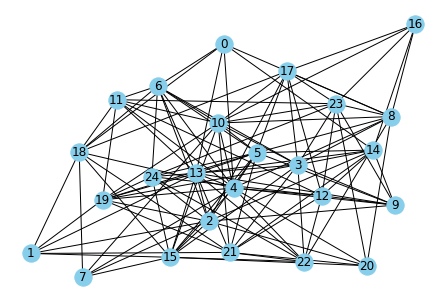

Top 5 Nodes By Centrality:
      Degree        Betweenness      Closenes
1| 13:     0.625 |  4: 0.0749363 | 13:  0.727273 |
2|  4:     0.625 | 10: 0.0590341 |  4:  0.727273 |
3| 10:  0.541667 | 13:  0.054927 | 10:  0.685714 |
4|  5:  0.541667 |  2: 0.0494766 |  5:  0.685714 |
5| 15:       0.5 | 15: 0.0391933 | 15:  0.666667 |


In [96]:
def top5dict(d):
    # return list of tuples (key,value), of the top 5 pairs from given dictionary, by value. sorted downward.
    top5 = sorted(d.items(), key=lambda item: item[1])
    top5.reverse()
    return top5[:5]
    
    
G = erdos_renyi_graph(25,0.4)
nx.draw(G, with_labels = True, node_color="skyblue")
plt.show()

top_dc = top5dict(degree_centrality(G))
top_bc = top5dict(betweenness_centrality(G))
top_cc = top5dict(closeness_centrality(G))

print("Top 5 Nodes By Centrality:")
print("      Degree        Betweenness      Closenes")
for i in range(5):
    print("{}| {:2}: {:9.6} | {:2}: {:9.6} | {:2}: {:9.6} |".format
          (i+1,top_dc[i][0],top_dc[i][1],top_bc[i][0],top_bc[i][1],top_cc[i][0],top_cc[i][1]))

### Question 2c

Degree Centrality visualization:


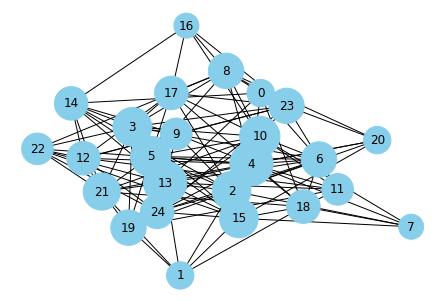

Betweenness Centrality visualization:


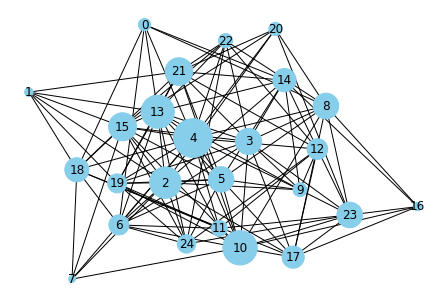

Closeness Centrality visualization:


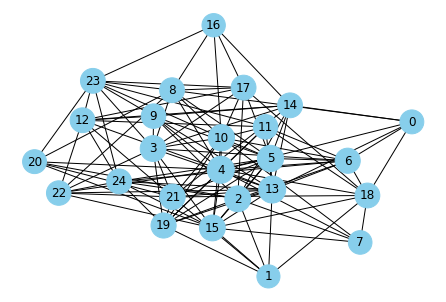

Average Centrality visualization (all centralities combined):


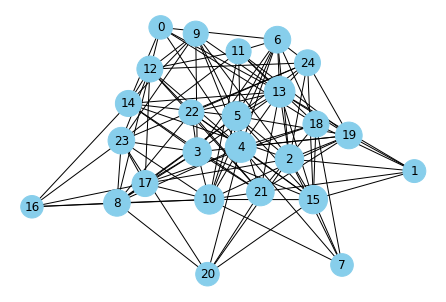

In [118]:
dc = degree_centrality(G)
bc = betweenness_centrality(G)
cc = closeness_centrality(G)

print("Degree Centrality visualization:")
size_map_dc = [v*3000 for v in dc.values()]    
nx.draw(G, node_size = size_map_dc, with_labels = True, node_color="skyblue")
plt.show()

print("Betweenness Centrality visualization:")
size_map_bc = [v*20000 for v in bc.values()]    
nx.draw(G, node_size = size_map_bc, with_labels = True, node_color="skyblue")
plt.show()

print("Closeness Centrality visualization:")
size_map_cc = [v*1000 for v in cc.values()]    
nx.draw(G, node_size = size_map_cc, with_labels = True, node_color="skyblue")
plt.show()

print("Average Centrality visualization (all centralities combined):")
size_map_avg = [(((dc[i]+bc[i]+cc[i])/3)*2000) for i in range(len(G))]    
nx.draw(G, node_size = size_map_avg, with_labels = True, node_color="skyblue")
plt.show()

### Question 2d

# Degree Centrality computation:
1. Red: 5  
2. Green: 5   
3. Grey: 4  
4. Blue: 1  

#### Betweenness Centrality computation:
1. Green: (1/1) * 4  +  ((1/1) * 4) * 4  +  (1/1) * 6  =  26  
2. Red:   (1/1) * 4  +  ((1/1) * 4) * 4  =  20  
3. Grey:  0  
4. Blue:  0  

#### Closeness Centrality computation:
1. Red:   (1/1) * 5  +  (1/2) * 4  =  7  
2. Green: (1/1) * 5  +  (1/2) * 4  =  7  
3. Grey:  (1/1) * 4  +  (1/2) * 1  +  (1/3) * 4  =  5.8333  
4. Blue:  (1/1) * 1  +  (1/2) * 4  +  (1/3) * 4  =  4.3333  




#### Diffrence between Green and Grey:  
The green node has a high centrality in all types, because it has the highest degree in the graph, it is a part of all shortest paths between blues and the greys + red, and between the blues themselves (Betweenness). Also the green node is  "in the middle", meaning it is close to all nodes, and not on the margin (Closeness). It is not farther than 2 steps from all nodes,
On the other hand, the grey nodes are on the margin of the graph, so they are 3 steps apart from the all blue nodes (Closeness). The greys are also not a part of any short-path, as the red node connects them all directly to the rest of the graph. The greys do have a high degree paramater of 4, but green has a higher one, of 5.

  
 ## Question 3

### Question 3a

In [8]:
def check_balance(G):
    # Create subgraph of positive edges.
    pos_G = nx.subgraph_view(G, filter_edge = lambda a,b : G[a][b]['label'] == '+')
    
    # Find the connected components.
    # If there is a negative edge inside the component the graph isn't balanced.
    for c in nx.connected_components(pos_G):
        for node in c:
            for neighb in G[node]:
                if G[node][neighb]['label'] == '-' and neighb in c:
                    print("Graph is unbalanaced: negative edge (" + node + "," + neighb +") inside positive connected component")
                    return False
    
    # Creating the super-nodes graph. If the graph isn't bipartite there is a circle of negative edges with of odd length and
    # the graph isn't balanced.
    same_supernode = lambda u,v : u in nx.descendants(pos_G, v)
    G = nx.quotient_graph(G, same_supernode)
    if (not nx.is_bipartite(G)):
        print("Graph is unbalanaced: super-nodes graph isn't bipartite.")
        return False
    return True

<p dir="rtl" style="text-align:right">
3.a החלטנו לממש את הבדיקה האם הגרף מאוזן בשיטה שנלמדה בשיעור: תחילה ע"י מציאת רכיבי קשירות ביחס לקשתות החיוביות, ואז בדיקה האם גרף העל הוא גרף דו-צדדי.
    ממשנו את הבדיקה בצורה זו מכיוון והמימוש אינטואיטיבי (מציאת "קואליציות") ובעל יעילות טובה (לינארי ביחס לקשתות ולקודקודים).
    במהלך הבדיקה אנו מוודאים כי אין קשתות שליליות בין צמתים ברכיב קשירות חיובי, וכי הגרף הנוצר הוא דו צדדי ולכן אין מעגלים שליליים באורך אי-זוגי (השקולים למעגלים עם מספר אי זוגי של קשתות שליליות בגרף המקורי).
</p>
<p dir="rtl" style="text-align:right">
תוצאות הבדיקה על גרפים שונים:
</p>

In [9]:
def draw_signed_graph(G):
    p_edges=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] =='+']
    n_edges=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == '-']

    # Retrieve the positions from graph nodes and save to a dictionary
    pos=nx.spring_layout(G)
    # Draw nodes
    nx.draw_networkx_nodes(G,pos,node_size=700, node_color='orange')

    # Draw edges
    nx.draw_networkx_edges(G,pos,edgelist=p_edges, width = 2, edge_color='g')
    nx.draw_networkx_edges(G,pos,edgelist=n_edges, width = 2, edge_color='r')

    # Draw node labels
    nx.draw_networkx_labels(G,pos)

    # Draw edge labels
    edge_labels =dict([((u, v), d['label']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show() # display

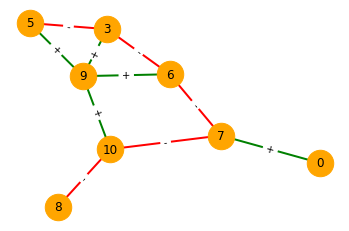

Graph is unbalanaced: negative edge (3,6) inside positive connected component


False

In [10]:
G3=nx.Graph()
# Add nodes by specifying their positions
G3.add_node('10')
G3.add_node('9')
G3.add_node('8')
G3.add_node('7')
G3.add_node('6')
G3.add_node('5')
G3.add_node('3')
G3.add_node('0')
# Add edges by defining weight and label
G3.add_edge('10','9', label='+')
G3.add_edge('10','8', label='-')
G3.add_edge('10','7', label='-')
G3.add_edge('9','3',  label='+')
G3.add_edge('9','6', label='+')
G3.add_edge('9','5', label='+')
G3.add_edge('7','0', label='+')
G3.add_edge('7','6', label='-')
G3.add_edge('6','3', label='-')
G3.add_edge('5','3', label='-')

draw_signed_graph(G3)
check_balance(G3)

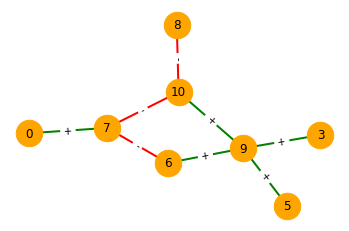

True

In [11]:
G4 = G3.copy();
G4.remove_edge('6','3')
G4.remove_edge('5','3')

draw_signed_graph(G4)
check_balance(G4)

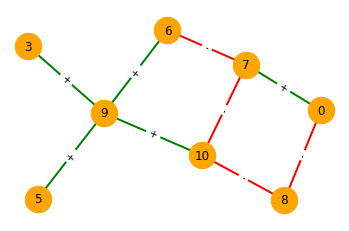

Graph is unbalanaced: super-nodes graph isn't bipartite.


False

In [12]:
G5 = G4.copy();
G5.add_edge('8','0', label='-')

draw_signed_graph(G5)
check_balance(G5)

### Question 3b

In [20]:
def assign_edge_sign_withh_probabilty(G, p):
    for e in G.edges:
        G[e[0]][e[1]]['label'] = '+' if random.random() < p else '-'

#### i.

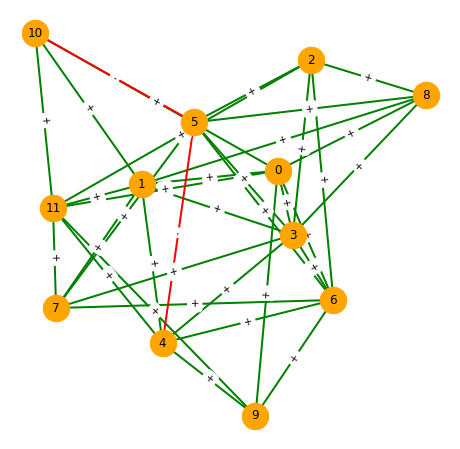

Graph is unbalanaced: negative edge (5,4) inside positive connected component


False

In [21]:
G = erdos_renyi_graph(12, 0.6)
assign_edge_sign_withh_probabilty(G, 0.95)

plt.figure(figsize=(8,8)) 
draw_signed_graph(G)
check_balance(G)

#### ii.

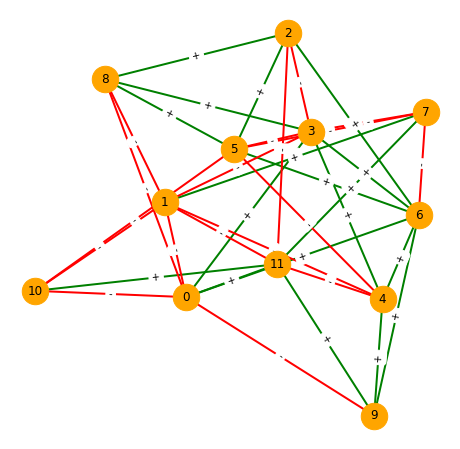

Graph is unbalanaced: negative edge (1,0) inside positive connected component


False

In [22]:
assign_edge_sign_withh_probabilty(G, 0.5)

plt.figure(figsize=(8,8)) 
draw_signed_graph(G)
check_balance(G)

#### ii.

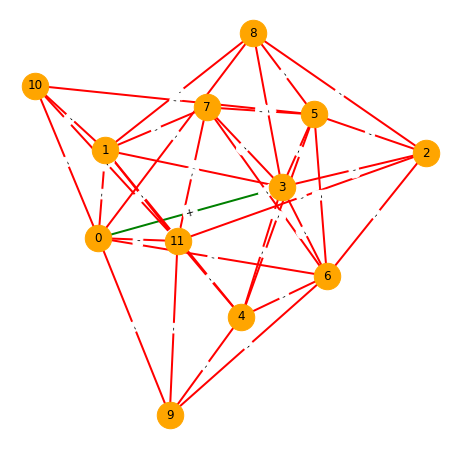

Graph is unbalanaced: super-nodes graph isn't bipartite.


False

In [28]:
assign_edge_sign_withh_probabilty(G, 0.05)

plt.figure(figsize=(8,8)) 
draw_signed_graph(G)
check_balance(G)

### Question 3d

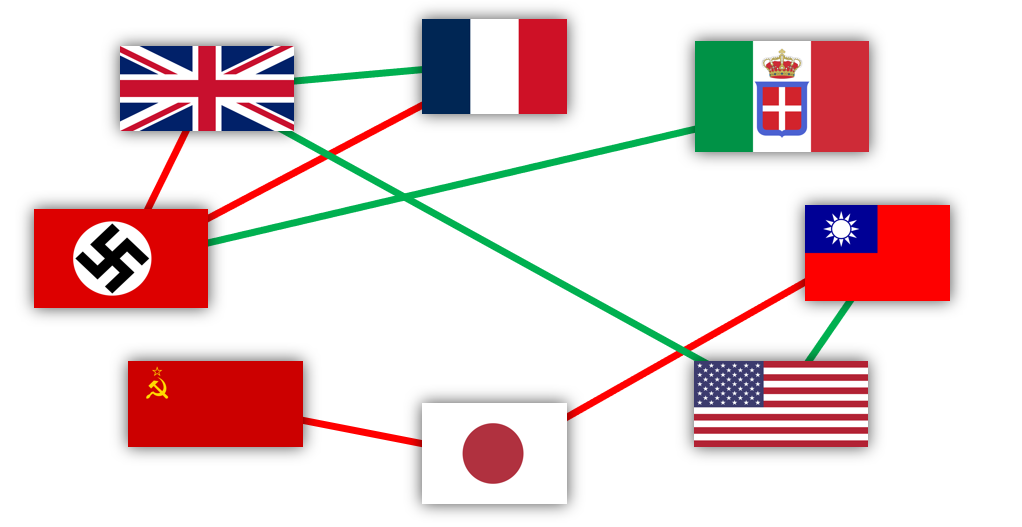

<p dir="rtl" style="text-align:right">
רשת חברתית המייצגת פישוט של יחסי המעצמות פרוץ מלמחת העולם השניה. פירוט הקשתות:  
בריטניה - צרפת: קשת חיובית, קרבה וברית אסטרטגית במאה ה20 ובמהלך מלחמת העולם הראשונה.
    בריטניה - גרמניה + צרפת - גרמניה: קשתות שליליות, שתי המעצמות התנגדו להתפשטות גרמניה הנאצית לפני המלחמה. בעקבות ברית ההגנה על פולין מלחמת העולם פרצה עם פלישת גרמניה לפולין והכרזת מלחמה של צרפת ובריטניה כנגדה.
    גרמניה - איטליה: קשת חיובית, ברית הפלדה.
    ארה"ב - בריטניה: קשת חיובית, קרבה ותמיכה בשנים שקדמו למלחמה.
    יפן - סין: קשת שלילית, מלחמת סין - יפן השניה מאז 1937.
    ארה"ב - סין: תמיכת ארה"ב בסין במהלך מלחמת סין - יפן השניה.
    יפן - ברית המועצות: קשת שלילית, מתיחות בעקבות שאיפותיה הטריטוריאליות של יפן בצפון וכיבוש מנצ'וריה.
</p>
<p dir="rtl" style="text-align:right">
נשים לב כי הרשת מקיימת את תאוריית האיזון: אין משולשים אם מספר אי-זוגי של קשתות שליליות בגרף. ניתן גם לראות כיצד מערכות היחסים בגרף מובילות לייצירתן של שתי קואלציות - מדינות הציר, הכוללות את גרמניה איטליה ויפן, ובעלות הברית הכוללות את צרפת בריטניה ארה"ב וברית המועצות.
</p>